In [1]:
#importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the data

In [7]:
ins=pd.read_csv("insurance.csv")

In [8]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [9]:
#shape

In [10]:
ins.shape

(1338, 7)

In [11]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#no changes required in data types

In [13]:
#let's find out for missing values

In [14]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#found no missing values, we can go ahead and perform our analysis

In [16]:
# which age group has the insurance plan?

In [17]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
#by this i came to know that min age present is 18 and max is 64

In [19]:
ins['age_group']=np.where((ins['age']>=18) & (ins['age']<=28),'18-28',np.where((ins['age']>=29) & (ins['age']<=38),'29-38',np.where((ins['age']>=39) & (ins['age']<=48),'39-48',np.where((ins['age']>=39) & (ins['age']<=48),'39-48',np.where((ins['age']>=49) & (ins['age']<=58),'49-58','59-68')))))

In [20]:
ins['age_group'].unique()

array(['18-28', '29-38', '39-48', '59-68', '49-58'], dtype=object)

In [21]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,18-28
1,18,male,33.770,1,no,southeast,1725.55230,18-28
2,28,male,33.000,3,no,southeast,4449.46200,18-28
3,33,male,22.705,0,no,northwest,21984.47061,29-38


In [22]:
ins['age_group'].value_counts().sort_values(ascending=False)

18-28    390
39-48    276
49-58    274
29-38    259
59-68    139
Name: age_group, dtype: int64

In [23]:
df=ins['age_group'].value_counts().sort_values(ascending=False)

In [24]:
df

18-28    390
39-48    276
49-58    274
29-38    259
59-68    139
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Age group insurance')

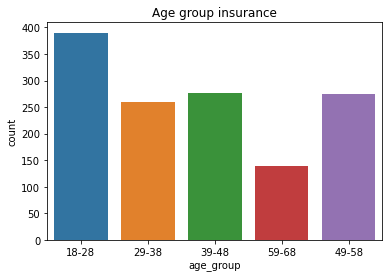

In [25]:
sns.countplot(x='age_group',data=ins)
plt.title('Age group insurance')

In [26]:
# who is insured with the highest BMI(Body mass index) and how does his/her charges are compared to the rest?

In [27]:
#bmi is calculated as weight in kg divided by square of height and if bmi is less then 18.5 it comes underweight, bmi is 18.5 to 24.9 then normal, bmi as 25.0 to 29.9 then overweight and bmi if greate rthan 30.0 then obese range

In [28]:
ins['bmi'].max()

53.13

In [29]:
ins[ins['bmi']>=30.00]

,age,sex,bmi,children,smoker,region,charges,age_group
1,18,male,33.77,1,no,southeast,1725.55230,18-28
2,28,male,33.00,3,no,southeast,4449.46200,18-28
6,46,female,33.44,1,no,southeast,8240.58960,39-48
12,23,male,34.40,0,no,southwest,1826.84300,18-28
13,56,female,39.82,0,no,southeast,11090.71780,49-58
...,...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733,18-28
1332,52,female,44.70,3,no,southwest,11411.68500,49-58
1333,50,male,30.97,3,no,northwest,10600.54830,49-58
1334,18,female,31.92,0,no,northeast,2205.98080,18-28


In [30]:
#there are 707 people more than 30.0 bmi, to move further on analysis i will also check the mean and median of charges

In [31]:
ins[ins['charges']==ins['charges'].max()]

,age,sex,bmi,children,smoker,region,charges,age_group
543,54,female,47.41,0,yes,southeast,63770.42801,49-58


In [32]:
#the above part shows me the person with highest premium 

In [33]:
ins['charges'].mean(),ins['charges'].median()

(13270.422265141257, 9382.033)

In [34]:
ins['bmi'].mean(),ins['bmi'].median()

(30.663396860986538, 30.4)

#well taking out mean and median helped me find out that there are outliers , if you notice there is a high difference in mean and median which clearly says there is an outlier present in the data.

In [35]:
#Gender distribution having insurance 

In [36]:
gender=ins['sex'].unique()

In [37]:
gender

array(['female', 'male'], dtype=object)

In [38]:
cols=['pink','b']

In [39]:
counts=ins.groupby('sex').agg({'sex':'count'})

In [40]:
counts

,sex
sex,
female,662
male,676


In [41]:
counts1=np.array(counts)

In [42]:
counts2=counts1.flatten()
counts2

array([662, 676], dtype=int64)

([<matplotlib.patches.Wedge at 0x2634f148b20>,
 [Text(0.01807856899700512, 1.0998514287589123, 'female'),
  Text(-0.018078568997005745, -1.0998514287589123, 'male')],
 [Text(0.009861037634730065, 0.5999189611412249, '49.476832%'),
  Text(-0.009861037634730405, -0.5999189611412248, '50.523168%')])

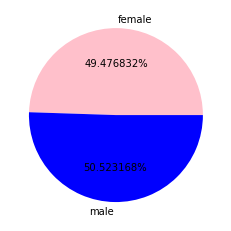

In [43]:
plt.pie(counts2,labels=gender,colors=cols,autopct='%f%%')

gender has no influence in insurance, men are women both are insured

In [44]:
#Do smoking causes high premium on insurance?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

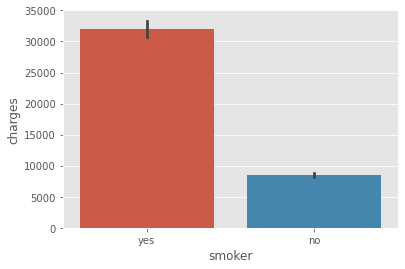

In [49]:
sns.barplot(x='smoker',y='charges',data=ins)

In [46]:
# yes,premium charges for smokers are indeed significantly higher than non-smokers.

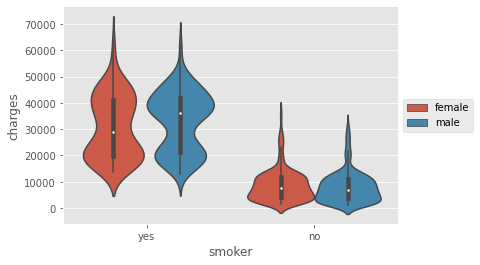

In [48]:
from matplotlib import style
style.use('ggplot')
sns.violinplot(x='smoker',y='charges',data=ins,hue='sex')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))

In [50]:
#gender,smoker and charges at one frame

In [51]:
ins.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

Among smokers, proportion of males (159) are higher than females (115). The average insurance premium for smokers are significantly higher than non-smokers

In [52]:
#Finding co-relation of data present in the dataset

In [57]:
ins['sex']=ins.sex.astype("category").cat.codes

In [58]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,yes,southwest,16884.92400,18-28
1,18,1,33.770,1,no,southeast,1725.55230,18-28
2,28,1,33.000,3,no,southeast,4449.46200,18-28
3,33,1,22.705,0,no,northwest,21984.47061,29-38


In [59]:
ins['smoker']=ins.smoker.astype("category").cat.codes

In [60]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,1,southwest,16884.92400,18-28
1,18,1,33.770,1,0,southeast,1725.55230,18-28
2,28,1,33.000,3,0,southeast,4449.46200,18-28
3,33,1,22.705,0,0,northwest,21984.47061,29-38


In [64]:
ins['region']=ins.region.astype("category").cat.codes

In [65]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,0,27.900,0,1,3,16884.92400,18-28
1,18,1,33.770,1,0,2,1725.55230,18-28
2,28,1,33.000,3,0,2,4449.46200,18-28
3,33,1,22.705,0,0,1,21984.47061,29-38


In [66]:
#droping age_group since it is not required in correlation

In [67]:
ins.drop(['age_group'],axis=1,inplace=True)

In [68]:
ins.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061


In [71]:
data=ins.corr()
data

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

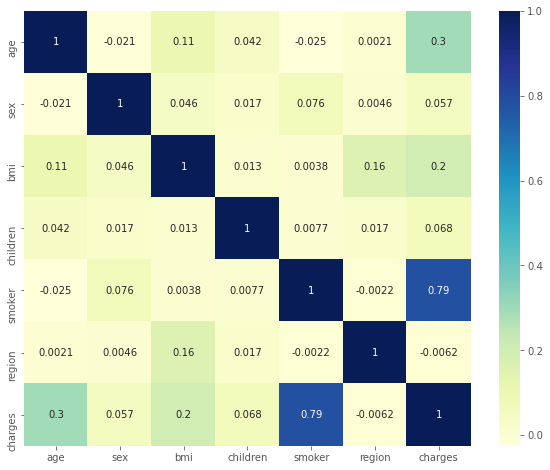

In [74]:
plt.figure(figsize=(10, 8))
sns.heatmap(data,cmap ='YlGnBu',annot=True)

From the correlation heatmap, we can conclude that the premium charges show a weak positive correlation with Age and BMI of the insured, and a strong positive correlation with smoking habit.